<a href="https://colab.research.google.com/github/oliia/NLP/blob/master/Project_NLP1_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Pre Processing

In [ ]:
import pandas as pd
sms = pd.read_table('/content/SMSSpamCollection', header=None)

print(sms)

print(sms.head())

sms.describe()

         0                                                  1
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]
      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fin

,0,1
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
## Data Info 

# Vecteur de valeurs cibles : 
y = sms[0]
y.value_counts()

ham     4825
spam     747
Name: 0, dtype: int64

In [ ]:
  # qu'il faut encoder en numérique :
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y)

y_enc

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# Création de la matrice des exemples
raw_text = sms[1]

print(raw_text)

print(pd.isnull(sms))

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: 1, Length: 5572, dtype: object
          0      1
0     False  False
1     False  False
2     False  False
3     False  False
4     False  False
...     ...    ...
5567  False  False
5568  False  False
5569  False  False
5570  False  False
5571  False  False

[5572 rows x 2 columns]


In [ ]:
# Basic Visualization

import matplotlib as plt
import seaborn as sns

sms.columns=['label', 'msg']
sms.head()



,label,msg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
    # ajout de mesures 
sms["length"] = sms["msg"].apply(len)
sms.head()

,lbl,msg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


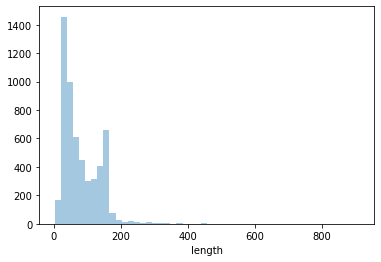

In [ ]:
sns.distplot(sms["length"], kde = False)

## 2 Pre-Processing


In [ ]:
# Step 1: Contraction Mapping / Expanding Contractions
!pip install contractions
import contractions

     |████████████████████████████████| 245kB 3.9MB/s 
     |████████████████████████████████| 317kB 18.5MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81702 sha256=07c927481d79d327b4ef57433bc635358b1c3e40e72e514a0d5b54394ac26ab9
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [ ]:
    # creation d'une nouvelle colonne sans contractions
sms['no_contract'] = sms['msg'].apply(lambda x: [contractions.fix(word) for word in x.split()])
print(sms.head())
    # we would want the expanded contractions to be tokenized separately, therefore we convert the lists under the "no_contract" column back into strings
sms["msg_str"] = [' '.join(map(str, l)) for l in sms['no_contract']]
sms.head()

  label  ...                                          tokenized
0   ham  ...  [Go, until, jurong, point, ,, crazy.., Availab...
1   ham  ...         [Ok, lar, ..., Joking, wif, you, oni, ...]
2  spam  ...  [Free, entry, in, 2, a, wkly, comp, to, win, F...
3   ham  ...  [you, dun, say, so, early, hor, ..., you, c, a...
4   ham  ...  [Nah, I, do, not, think, he, goes, to, usf, ,,...

[5 rows x 6 columns]


,label,msg,length,no_contract,msg_str,tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,..."


In [ ]:
    # tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

sms['tokenized'] = sms['msg_str'].apply(word_tokenize)
sms.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,label,msg,length,no_contract,msg_str,tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,..."


In [ ]:
    # Step 3: Noise Cleaning - spacing, special characters, lowercasing
sms.sample(frac=0.05)

,label,msg,length,no_contract,msg_str,tokenized
2825,ham,No need to buy lunch for me.. I eat maggi mee..,47,"[No, need, to, buy, lunch, for, me.., I, eat, ...",No need to buy lunch for me.. I eat maggi mee..,"[No, need, to, buy, lunch, for, me.., I, eat, ..."
785,ham,Dont think so. It turns off like randomlly wit...,65,"[do not, think, so., It, turns, off, like, ran...",do not think so. It turns off like randomlly w...,"[do, not, think, so, ., It, turns, off, like, ..."
1509,ham,Sounds like something that someone testing me ...,56,"[Sounds, like, something, that, someone, testi...",Sounds like something that someone testing me ...,"[Sounds, like, something, that, someone, testi..."
2651,ham,Do you like shaking your booty on the dance fl...,50,"[Do, you, like, shaking, your, booty, on, the,...",Do you like shaking your booty on the dance fl...,"[Do, you, like, shaking, your, booty, on, the,..."
1598,spam,URGENT! Your Mobile number has been awarded wi...,143,"[URGENT!, Your, Mobile, number, has, been, awa...",URGENT! Your Mobile number has been awarded wi...,"[URGENT, !, Your, Mobile, number, has, been, a..."
...,...,...,...,...,...,...
3262,ham,Yup i'm still having coffee wif my frens... My...,82,"[Yup, I am, still, having, coffee, wif, my, fr...",Yup I am still having coffee wif my frens... M...,"[Yup, I, am, still, having, coffee, wif, my, f..."
4112,spam,URGENT! Your Mobile number has been awarded a ...,141,"[URGENT!, Your, Mobile, number, has, been, awa...",URGENT! Your Mobile number has been awarded a ...,"[URGENT, !, Your, Mobile, number, has, been, a..."
1220,ham,True. It is passable. And if you get a high sc...,119,"[True., It, is, passable., And, if, you, get, ...",True. It is passable. And if you get a high sc...,"[True, ., It, is, passable, ., And, if, you, g..."
820,ham,BOO BABE! U ENJOYIN YOURJOB? U SEEMED 2 B GETT...,124,"[BOO, BABE!, you, ENJOYIN, YOURJOB?, you, SEEM...",BOO BABE! you ENJOYIN YOURJOB? you SEEMED 2 B ...,"[BOO, BABE, !, you, ENJOYIN, YOURJOB, ?, you, ..."


In [ ]:
sms['lower'] = sms['tokenized'].apply(lambda x: [word.lower() for word in x])
sms.head()

,label,msg,length,no_contract,msg_str,tokenized,lower
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[go, until, jurong, point, ,, crazy.., availab..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,..."


In [ ]:
    # Ponctuation
import string
punc = string.punctuation
sms['no_punc'] = sms['lower'].apply(lambda x: [word for word in x if word not in punc])
sms.head()

,label,msg,length,no_contract,msg_str,tokenized,lower,no_punc
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[go, until, jurong, point, ,, crazy.., availab...","[go, until, jurong, point, crazy.., available,..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he..."


In [ ]:
    # Spell Checking
!pip install pyspellchecker

     |████████████████████████████████| 1.9MB 2.9MB/s 


In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
#misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])
misspelled_sms = spell.unknown(sms['no_punc'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

TypeError: ignored

In [ ]:
# Stop words 

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
sms['stopwords_removed'] = sms['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
sms.head()

,label,msg,length,no_contract,msg_str,tokenized,lower,no_punc,stopwords_removed
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[go, until, jurong, point, ,, crazy.., availab...","[go, until, jurong, point, crazy.., available,...","[go, jurong, point, crazy.., available, bugis,..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[dun, say, early, hor, ..., c, already, say, ...]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he...","[nah, think, goes, usf, lives, around, though]"


## Stemming/Lemmatization 
Lemmatization :  
1. POS 
2. POS conversion to wordnet's format 


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
sms['pos_tags'] = sms['stopwords_removed'].apply(nltk.tag.pos_tag)
sms.head()

,label,msg,length,no_contract,msg_str,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[go, until, jurong, point, ,, crazy.., availab...","[go, until, jurong, point, crazy.., available,...","[go, jurong, point, crazy.., available, bugis,...","[(go, VB), (jurong, JJ), (point, NN), (crazy....."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, oni, ...]","[(ok, JJ), (lar, NN), (..., :), (joking, VBG),..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[(free, JJ), (entry, NN), (2, CD), (wkly, JJ),..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[dun, say, early, hor, ..., c, already, say, ...]","[(dun, NNS), (say, VBP), (early, JJ), (hor, NN..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he...","[nah, think, goes, usf, lives, around, though]","[(nah, RB), (think, NN), (goes, VBZ), (usf, JJ..."


In [ ]:
#NLTK’s word lemmatizer which needs the parts of speech tags to be converted to wordnet’s format. 
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# We’ll write a function which make the proper conversion and then use the function within a list comprehension to apply the conversion.
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
sms['wordnet_pos'] = sms['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
sms.head()

,label,msg,length,no_contract,msg_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[go, until, jurong, point, ,, crazy.., availab...","[go, until, jurong, point, crazy.., available,...","[go, jurong, point, crazy.., available, bugis,...","[(go, VB), (jurong, JJ), (point, NN), (crazy.....","[(go, v), (jurong, a), (point, n), (crazy.., n..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, oni, ...]","[(ok, JJ), (lar, NN), (..., :), (joking, VBG),...","[(ok, a), (lar, n), (..., n), (joking, v), (wi..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[(free, JJ), (entry, NN), (2, CD), (wkly, JJ),...","[(free, a), (entry, n), (2, n), (wkly, a), (co..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[dun, say, early, hor, ..., c, already, say, ...]","[(dun, NNS), (say, VBP), (early, JJ), (hor, NN...","[(dun, n), (say, v), (early, a), (hor, n), (....."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he...","[nah, think, goes, usf, lives, around, though]","[(nah, RB), (think, NN), (goes, VBZ), (usf, JJ...","[(nah, r), (think, n), (goes, v), (usf, a), (l..."


In [ ]:
# Now we can apply NLTK’s word lemmatizer within our trusty list comprehension. 
# Notice, the lemmatizer function requires two parameters the word and its tag (in wordnet form).

from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
sms['lemmatized'] = sms['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
sms.head()

,label,msg,length,no_contract,msg_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[go, until, jurong, point, ,, crazy.., availab...","[go, until, jurong, point, crazy.., available,...","[go, jurong, point, crazy.., available, bugis,...","[(go, VB), (jurong, JJ), (point, NN), (crazy.....","[(go, v), (jurong, a), (point, n), (crazy.., n...","[go, jurong, point, crazy.., available, bugis,..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, oni, ...]","[(ok, JJ), (lar, NN), (..., :), (joking, VBG),...","[(ok, a), (lar, n), (..., n), (joking, v), (wi...","[ok, lar, ..., joke, wif, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[(free, JJ), (entry, NN), (2, CD), (wkly, JJ),...","[(free, a), (entry, n), (2, n), (wkly, a), (co...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[dun, say, early, hor, ..., c, already, say, ...]","[(dun, NNS), (say, VBP), (early, JJ), (hor, NN...","[(dun, n), (say, v), (early, a), (hor, n), (.....","[dun, say, early, hor, ..., c, already, say, ...]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he...","[nah, think, goes, usf, lives, around, though]","[(nah, RB), (think, NN), (goes, VBZ), (usf, JJ...","[(nah, r), (think, n), (goes, v), (usf, a), (l...","[nah, think, go, usf, life, around, though]"


In [ ]:
# Lastly, we should save all of our pre-processing work for the next steps in the workflow. We can simnple save it as a csv file.
sms.to_csv('sms_spam_collection.csv')

# 2. Feature engineering

1. Part of Speech (POS)
2. Shallow Parsing or Chunking
3. Named Entity Recognition (NER)
4. N-Grams